Predicciones de precios para nuevas casas:
   CalidadGeneral  MetrosHabitables  BañosCompletos Vecindario  \
0               9               300               3    NoRidge   

   Precio_Predicho  
0         301762.7  


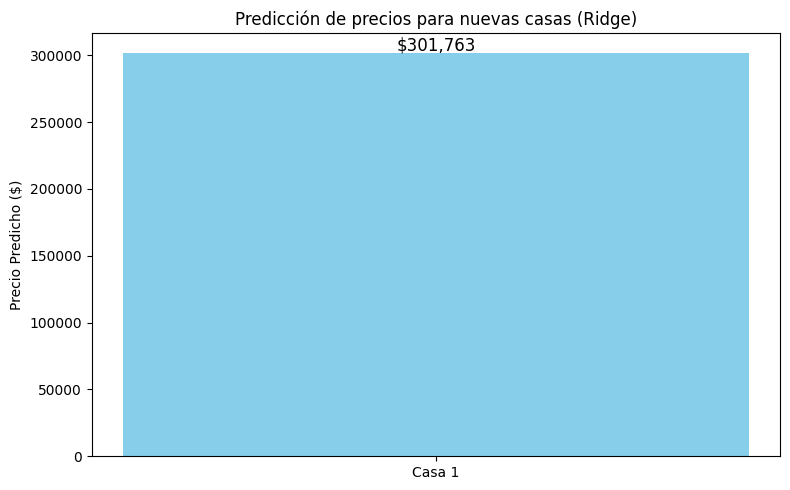

In [4]:
# Paso 1: Cargar el modelo Ridge exportado
import pickle
import pandas as pd
import numpy as np

with open('../model/modelo_ridge_california_housing.pkl', 'rb') as archivo:
    modelo_dict = pickle.load(archivo)

ridge_model = modelo_dict['modelo']
scaler = modelo_dict['scaler']
vars_num = modelo_dict['variables_numericas']
vars_cat = modelo_dict['variables_categoricas_originales']
vars_cat_encoded = modelo_dict['variables_categoricas_encoded']

# Paso 2: Crear un DataFrame de ejemplo con nuevas casas
nuevas_casas = pd.DataFrame({
    'CalidadGeneral': [9],
    'MetrosHabitables': [300],
    'CochesGaraje': [1],
    'ÁreaGaraje': [67],
    'MetrosTotalesSótano': [45],
    'Metros1raPlanta': [45],
    'BañosCompletos': [3],
    'TotalHabitacionesSobreSuelo': [8],
    'AñoConstrucción': [2015],
    'AñoRenovación': [2018],
    'ÁreaRevestimientoMampostería': [20],
    'Chimeneas': [2],
    'MetrosAcabadosSótano1': [80],
    'FrenteLote': [10],
    # Variables categóricas (elige valores válidos según tu dataset)
    'CalidadExterior': ['Ex'],
    'CalidadCocina': ['Fa'],
    'CalidadSótano': ['Fa'],
    'AcabadoGaraje': ['Fa'],
    'AireAcondicionadoCentral': ['N'],
    'CalidadChimenea': ['Ex'],
    'Cimentación': ['PConc'],
    'TipoGaraje': ['Attchd'],
    'TipoRevestimientoMampostería': ['BrkFace'],
    'CalidadCalefacción': ['Ex'],
    'Vecindario': ['NoRidge']
})

# Paso 3: Preprocesar las nuevas casas
# 3.1. Estandarizar variables numéricas
X_nuevas = nuevas_casas.copy()
X_nuevas[vars_num] = scaler.transform(X_nuevas[vars_num])

# 3.2. One-hot encoding para variables categóricas (sin drop_first para que todas las categorías tengan columna)
for var in vars_cat:
    dummies = pd.get_dummies(X_nuevas[var], prefix=var, drop_first=False)
    X_nuevas = pd.concat([X_nuevas, dummies], axis=1)

# 3.3. Asegurar que las columnas coincidan con las usadas en el entrenamiento
for col in vars_cat_encoded:
    if col not in X_nuevas.columns:
        X_nuevas[col] = 0  # Si la categoría no está presente, poner 0
X_nuevas = X_nuevas[vars_num + vars_cat_encoded]

# Paso 4: Realizar la predicción
y_pred_log = ridge_model.predict(X_nuevas)
y_pred = np.expm1(y_pred_log)  # Volver a escala original

# Paso 5: Mostrar los resultados
resultados = nuevas_casas.copy()
resultados['Precio_Predicho'] = y_pred.round(2)
print('Predicciones de precios para nuevas casas:')
print(resultados[['CalidadGeneral', 'MetrosHabitables', 'BañosCompletos', 'Vecindario', 'Precio_Predicho']])

# Visualización simple
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(range(len(y_pred)), y_pred, color='skyblue')
plt.xticks(range(len(y_pred)), [f"Casa {i+1}" for i in range(len(y_pred))])
plt.ylabel('Precio Predicho ($)')
plt.title('Predicción de precios para nuevas casas (Ridge)')
for i, v in enumerate(y_pred):
    plt.text(i, v + 2000, f"${v:,.0f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Cambia la ruta al archivo .pkl que quieres leer
ruta_pkl = 'modelo_ridge_california_housing.pkl'

# Abrir y cargar el archivo
with open(ruta_pkl, 'rb') as archivo:
    contenido = pickle.load(archivo)

# Ver el tipo y las claves principales del objeto cargado
print(type(contenido))
if isinstance(contenido, dict):
    print("Claves del diccionario:", contenido.keys())
    # Opcional: ver un resumen de cada elemento
    for clave, valor in contenido.items():
        print(f"\nClave: {clave}")
        print(f"Tipo: {type(valor)}")
        # Si es una lista o DataFrame, muestra un resumen
        if isinstance(valor, list):
            print(f"Ejemplo de contenido: {valor[:3]}")
        elif hasattr(valor, 'shape'):
            print(f"Shape: {valor.shape}")
        else:
            print(valor)
else:
    print(contenido)

<class 'dict'>
Claves del diccionario: dict_keys(['modelo', 'scaler', 'variables_numericas', 'variables_categoricas_originales', 'variables_categoricas_encoded', 'mejor_alpha', 'transformacion_log'])

Clave: modelo
Tipo: <class 'sklearn.linear_model._ridge.Ridge'>
Ridge(alpha=np.float64(1.232846739442066), random_state=42)

Clave: scaler
Tipo: <class 'sklearn.preprocessing._data.StandardScaler'>
StandardScaler()

Clave: variables_numericas
Tipo: <class 'list'>
Ejemplo de contenido: ['CalidadGeneral', 'MetrosHabitables', 'CochesGaraje']

Clave: variables_categoricas_originales
Tipo: <class 'list'>
Ejemplo de contenido: ['CalidadExterior', 'CalidadCocina', 'CalidadSótano']

Clave: variables_categoricas_encoded
Tipo: <class 'list'>
Ejemplo de contenido: ['CalidadExterior_Fa', 'CalidadExterior_Gd', 'CalidadExterior_TA']

Clave: mejor_alpha
Tipo: <class 'numpy.float64'>
Shape: ()

Clave: transformacion_log
Tipo: <class 'bool'>
True


In [8]:
import pickle

ruta_pkl = 'modelo_ridge_california_housing.pkl'

with open(ruta_pkl, 'rb') as archivo:
    contenido = pickle.load(archivo)

# Imprime TODO el contenido de cada clave relevante
for clave, valor in contenido.items():
    print(f"\n=== {clave.upper()} ===")
    if isinstance(valor, list):
        print(valor)  # Muestra la lista completa
    elif hasattr(valor, 'get_params'):
        print(valor)  # Modelos/sklearn objects
    else:
        print(valor)


=== MODELO ===
Ridge(alpha=np.float64(1.232846739442066), random_state=42)

=== SCALER ===
StandardScaler()

=== VARIABLES_NUMERICAS ===
['CalidadGeneral', 'MetrosHabitables', 'CochesGaraje', 'ÁreaGaraje', 'MetrosTotalesSótano', 'Metros1raPlanta', 'BañosCompletos', 'TotalHabitacionesSobreSuelo', 'AñoConstrucción', 'AñoRenovación', 'ÁreaRevestimientoMampostería', 'Chimeneas', 'MetrosAcabadosSótano1', 'FrenteLote']

=== VARIABLES_CATEGORICAS_ORIGINALES ===
['CalidadExterior', 'CalidadCocina', 'CalidadSótano', 'AcabadoGaraje', 'AireAcondicionadoCentral', 'CalidadChimenea', 'Cimentación', 'TipoGaraje', 'TipoRevestimientoMampostería', 'CalidadCalefacción', 'Vecindario']

=== VARIABLES_CATEGORICAS_ENCODED ===
['CalidadExterior_Fa', 'CalidadExterior_Gd', 'CalidadExterior_TA', 'CalidadCocina_Fa', 'CalidadCocina_Gd', 'CalidadCocina_TA', 'CalidadSótano_Fa', 'CalidadSótano_Gd', 'CalidadSótano_NoSótano', 'CalidadSótano_TA', 'AcabadoGaraje_NoGaraje', 'AcabadoGaraje_RFn', 'AcabadoGaraje_Unf', 'Aire

In [5]:
# Paso 1: Cargar el modelo (correcto)
with open('modelo_ridge_california_housing.pkl', 'rb') as archivo:
    modelo_dict = pickle.load(archivo)

ridge_model = modelo_dict['modelo']
scaler = modelo_dict['scaler']
vars_num = modelo_dict['variables_numericas']
vars_cat = modelo_dict['variables_categoricas_originales']
vars_cat_encoded = modelo_dict['variables_categoricas_encoded']
transformacion_log = modelo_dict['transformacion_log']  # ¡Nuevo!

# Paso 2: DataFrame de ejemplo (ajustar categorías)
nuevas_casas = pd.DataFrame({
    # Variables numéricas
    'CalidadGeneral': [8],
    'MetrosHabitables': [50],
    'CochesGaraje': [2],
    'ÁreaGaraje': [500],
    'MetrosTotalesSótano': [1000],
    'Metros1raPlanta': [1500],
    'BañosCompletos': [3],
    'TotalHabitacionesSobreSuelo': [8],
    'AñoConstrucción': [2010],
    'AñoRenovación': [2017],
    'ÁreaRevestimientoMampostería': [250],
    'Chimeneas': [1],
    'MetrosAcabadosSótano1': [800],
    'FrenteLote': [60],
    
    # Variables categóricas (usando solo valores existentes en el modelo)
    'CalidadExterior': ['Fa'],       # Opciones: Fa, Gd, TA
    'CalidadCocina': ['Gd'],         # Opciones: Fa, Gd, TA  
    'CalidadSótano': ['Gd'],         # Opciones: Fa, Gd, NoSótano, TA
    'AcabadoGaraje': ['RFn'],        # Opciones: NoGaraje, RFn, Unf
    'AireAcondicionadoCentral': ['Y'], # Opciones: Y (solo esta categoría)
    'CalidadChimenea': ['Gd'],       # Opciones: Fa, Gd, NoTiene, Po, TA
    'Cimentación': ['PConc'],        # Opciones: CBlock, PConc, Slab, Stone, Wood
    'TipoGaraje': ['Attchd'],        # Opciones: Attchd, Basment, BuiltIn, CarPort, Detchd, NoGaraje
    'TipoRevestimientoMampostería': ['BrkFace'], # Opciones: BrkFace, Ninguno, Stone
    'CalidadCalefacción': ['Gd'],    # Opciones: Fa, Gd, Po, TA
    'Vecindario': ['NoRidge']        # Opciones: Blueste, BrDale, BrkSide, ClearCr, CollgCr, Crawfor, 
                                    # Edwards, Gilbert, IDOTRR, MeadowV, Mitchel, NAmes, NPkVill, 
                                    # NWAmes, NoRidge, NridgHt, OldTown, SWISU, Sawyer, SawyerW, 
                                    # Somerst, StoneBr, Timber, Veenker
})

# Paso 3: Preprocesamiento (mejorado)
X_nuevas = nuevas_casas.copy()

# 3.1. Estandarización numérica
X_nuevas[vars_num] = scaler.transform(X_nuevas[vars_num])

# 3.2. One-hot encoding (verificando categorías)
for var in vars_cat:
    # Verificar que los valores existen en el modelo
    valid_cats = [c.replace(f"{var}_", "") for c in vars_cat_encoded if c.startswith(var)]
    if not all(val in valid_cats for val in X_nuevas[var]):
        raise ValueError(f"Valores categóricos no válidos para {var}")
    
    dummies = pd.get_dummies(X_nuevas[var], prefix=var)
    X_nuevas = pd.concat([X_nuevas, dummies], axis=1)

# 3.3. Asegurar columnas (mejorado)
missing_cols = set(vars_cat_encoded) - set(X_nuevas.columns)
for col in missing_cols:
    X_nuevas[col] = 0
X_nuevas = X_nuevas[vars_num + vars_cat_encoded]

# Paso 4: Predicción (corregido)
y_pred_log = ridge_model.predict(X_nuevas)
y_pred = np.exp(y_pred_log) if transformacion_log else y_pred_log  # ¡Corregido!

# Paso 5: Resultados (correcto)
resultados = nuevas_casas.copy()
resultados['Precio_Predicho'] = y_pred.round(2)
print(resultados[['CalidadGeneral', 'MetrosHabitables', 'Precio_Predicho']])

   CalidadGeneral  MetrosHabitables  Precio_Predicho
0               8                50        689701.57
